In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

In [2]:
# def crossparsing
def cp(C,D):
    cend=[]
    a=-1
    b=-1
    m=-1
    n=-1
    target=-1
    if C==''or D=='':
        s=1   
    else:
        for i in range(len(C)):
            t=1
            for j in range(len(D)):
                if C[i]== D[j]:
                    a=i
                    b=j
                    m=a
                    n=b
                while m < len(C) and n<len(D) and C[a:m+1]==D[b:n+1]:
                    m=m+1
                    n=n+1
                long=m-a
                if long >= t:
                    t = long
                    target = m
            
            x=target-1
            y=n-1
            if b <len(D) and C[i]==D[b] :
                cend.append(x)
            else:
                cend.append(i)
        s_AB = len(set(cend))
        z = C.find(D);
        if z!=-1:
            ss=s_AB-1;
        else:
            ss = s_AB
        s=ss/len(C)    
    return s

In [3]:
# def distance the measurement criteria
def distCPD(C,D):
    s1 = cp(C,D);
    s2 = cp(D,C);
    dist = 0.5*(s1+s2);
    return dist

In [4]:
def toInt(list):
    result = []
    for i in range(len(list)):
        b = int(list[i])
        result.append(b)
    return result

In [5]:
def getDistance(list_text1, list_text2):
    dist = []
    if len(list_text1)!=len(list_text2):
        return("error")
    n = len(list_text1)
    for i in range(n):
        d = distCPD(list_text1[i],list_text2[i])
        dist.append(d)
    return dist

In [6]:
def prediction(dist_list, threshold):
    pre_list = [0]*len(dist_list)
    for i in range(len(dist_list)):
        if dist_list[i]<threshold:
            pre_list[i] = 1
    return pre_list

dirty_amazon_itunes

In [7]:
dirty_amazon_itunes_train = pd.read_csv("C:/project/final_data/dirty_amazon_itunes/train.tsv", sep="\t")
dirty_amazon_itunes_train

,idx,text_left,text_right,label
0,0,Illusion ( feat . Echosmith ) Zedd True Colors...,Transmission [ feat . X Ambassadors ] Dance & ...,0
1,1,I 'm a Machine ( feat . Crystal Nicole and Tyr...,I Can Only Imagine ( feat . Chris Brown & Lil ...,0
2,2,Silver and Gold 3:33 Little Big Town Pain Kill...,Silver And Gold Little Big Town Country ( C ) ...,1
3,3,Dangerous ( feat . Sam Martin ) [ Robin Schulz...,I 'll Keep Loving you ( feat . Birdy & Jaymes ...,0
4,4,True Colors ( feat . Nicki Minaj ) Wiz Khalifa...,Still Down ( feat . Chevy Woods & Ty Dolla $ i...,0
...,...,...,...,...
316,316,Same Love ( feat . Mary Lambert ) Macklemore &...,"White Walls ( feat . ScHoolboy Q , Hollis ) [ ...",0
317,317,Get Low ( Neo Fresco Remix ) Dillon Francis & ...,Woman Like Me ( Dillon Francis Remix ) Willy J...,0
318,318,Judas ( Royksopp 's 30 Pieces Remix ) Lady Gag...,Just Dance ( RedOne Remix ) ( C ) 2008 Intersc...,0
319,319,The Whisperer ( feat . Sia ) 2014 What A Music...,S.T.O.P ( feat . Ryan Tedder ) Listen ( Deluxe...,0


In [8]:
dirty_amazon_itunes_test = pd.read_csv("C:/project/final_data/dirty_amazon_itunes/test.tsv", sep="\t")
dirty_amazon_itunes_test

,idx,text_left,text_right,label
0,0,Elevator ( feat . Timbaland ) Flo Rida Mail On...,Money Right ( feat . Rick Ross & Brisco ) [ Ex...,0
1,1,The Woodland Realm ( Extended Version ) Howard...,The High Fells ( Extended Version ) The Hobbit...,0
2,2,Extra Extra Credit Wiz Khalifa Flight School $...,Extra Extra Credit [ Explicit ] Wiz Khalifa 20...,1
3,3,Toyfriend ( feat . Wynter Gordon ) [ Continuou...,Sound Of Letting Go ( Feat . Chris Willis ) Da...,0
4,4,Dangerous ( feat . Sam Martin ) [ Robin Schulz...,Missing You ( Feat . Novel ; Continuous Mix Ve...,0
...,...,...,...,...
104,104,Better Than Words One Direction Midnight Memor...,Better Than Words One Direction Pop $ 1.29 ( C...,1
105,105,The Whisperer ( feat . Sia ) David Guetta List...,"Hey Mama ( feat . Nicki Minaj , Bebe Rexha & A...",0
106,106,We Dem Boyz ( Louis Futon Remix ) We Dem Boyz ...,We Dem Boyz [ Explicit ] 2014 Atlantic Recordi...,0
107,107,Cold Game ( feat . Latoiya Williams ) Snoop Do...,Toyz N Da Hood ( Feat . Bootsy Collins ) [ Exp...,0


In [9]:
dist_dirty_amazon_itunes_train = getDistance(dirty_amazon_itunes_train['text_left'], dirty_amazon_itunes_train['text_right'])

In [10]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_amazon_itunes_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_dirty_amazon_itunes_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.02531645569620253
0.07407407407407407
0.07407407407407407
0.12048192771084336
0.1647058823529412
0.1647058823529412
0.1647058823529412
0.20689655172413793
0.24719101123595508
0.2666666666666667
0.326530612244898
0.3619047619047619
0.45762711864406785
0.4838709677419355
0.4761904761904762
0.4724409448818898
0.44776119402985076
0.4647887323943662
0.4794520547945206
0.4675324675324675
0.4484848484848485
0.4588235294117647
0.449438202247191
0.4505494505494505
0.46560846560846564
0.4766839378238342
0.49751243781094523
0.49261083743842365
0.49289099526066343
0.5022831050228311
0.504424778761062
0.5086206896551724
0.5232067510548523
0.5101214574898785
0.4961240310077519
0.5114503816793893
0.5166051660516605
0.5281690140845071
0.5205479452054794
0.5099337748344371
0.5032258064516129
0.48148148148148145
0.47129909365558914
0.45882352941176474
0.44571428571428573
0.43454038997214484
0.42391304347826086
0.41935483870967744
0.41489361702127664
0.41160949868073

In [11]:
print(max_f)
print(max_t)

0.5281690140845071
0.46


In [12]:
dist_dirty_amazon_itunes_test = getDistance(dirty_amazon_itunes_test['text_left'], dirty_amazon_itunes_test['text_right'])

In [13]:
real_test = toInt(dirty_amazon_itunes_test['label'])
pre_list = prediction(dist_dirty_amazon_itunes_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.5263157894736842


[[39 43]
 [ 2 25]]
[39 43  2 25]


Text(66.5, 0.5, 'True')

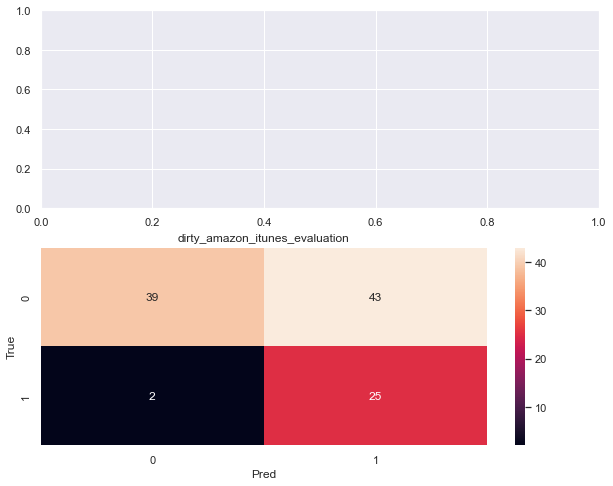

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_amazon_itunes_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [15]:
print("\nDetails of dirty_amazon_itunes =\n",classification_report(real_test, pre_list))


Details of dirty_amazon_itunes =
               precision    recall  f1-score   support

           0       0.95      0.48      0.63        82
           1       0.37      0.93      0.53        27

    accuracy                           0.59       109
   macro avg       0.66      0.70      0.58       109
weighted avg       0.81      0.59      0.61       109



dirty_dblp_acm

In [16]:
dirty_dblp_acm_train = pd.read_csv("C:/project/final_data/dirty_dblp_acm/train.tsv", sep="\t")
dirty_dblp_acm_train

,idx,text_left,text_right,label
0,0,web caching for database applications with ora...,form-based proxy caching for database-backed w...,0
1,1,oracle industrial exhibit 1998 amy pogue vldb,objectivity industrial exhibit objectivity ver...,0
2,2,extracting large-scale knowledge bases from th...,amalgamating knowledge bases v. s. subrahmania...,0
3,3,efficient optimistic concurrency control using...,efficient optimistic concurrency control using...,1
4,4,odefs : a file system interface to an object-o...,unisql/x unified relational and object-oriente...,0
...,...,...,...,...
7412,7412,editorial richard t. snodgrass 2001 acm trans ...,"guest editorial fabio casati , ming-chien shan...",0
7413,7413,sap r/3 : a database application system ( tuto...,delaunay : a database visualization system isa...,0
7414,7414,one-dimensional and multi-dimensional substrin...,selectivity estimation in spatial databases sw...,0
7415,7415,design principles for data-intensive web sites...,database principles acm sigmod record 2002 leo...,0


In [17]:
dirty_dblp_acm_test = pd.read_csv("C:/project/final_data/dirty_dblp_acm/test.tsv", sep="\t")
dirty_dblp_acm_test

,idx,text_left,text_right,label
0,0,secure transaction processing in firm real-tim...,secure buffering in firm real-time database sy...,0
1,1,clustering validity checking methods : part ii...,cluster validity methods : part i 2002 maria h...,0
2,2,a query language and optimization techniques f...,fundamental techniques for order optimization ...,0
3,3,structures for manipulating proposed updates i...,observations on the odmg-93 proposal for an ob...,0
4,4,integrating a structured-text retrieval system...,index nesting - an efficient approach to index...,0
...,...,...,...,...
2468,2468,discovery of influence sets in frequently upda...,discovery of influence sets in frequently upda...,1
2469,2469,space optimization in deductive databases acm ...,some issues in design of distributed deductive...,0
2470,2470,efficient geometry-based similarity search of ...,fast parallel similarity search in multimedia ...,0
2471,2471,fast incremental maintenance of approximate hi...,fast incremental maintenance of approximate hi...,1


In [18]:
dist_dirty_dblp_acm_train = getDistance(dirty_dblp_acm_train['text_left'], dirty_dblp_acm_train['text_right'])

In [19]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_dblp_acm_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_dirty_dblp_acm_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.00449438202247191
0.025203854707190516
0.06531204644412192
0.10384068278805121
0.15586206896551724
0.23614775725593667
0.3112791430371771
0.4122858830478441
0.5035971223021583
0.59105098855359
0.6738176499268649
0.7413554633471646
0.8045474420638391
0.8390367553865653
0.8671328671328671
0.8862903225806451
0.9016522423288748
0.9104247104247105
0.919969512195122
0.923019151333083
0.9314052651093807
0.9326993416239941
0.9346879535558781
0.9310344827586208
0.9287749287749288
0.926829268292683
0.9208683473389355
0.9173036831132731
0.9093406593406594
0.9019741320626276
0.8965517241379309
0.8894101876675602
0.8820206048521103
0.8748353096179183
0.8674934725848564
0.8574193548387097
0.8486590038314177
0.8374291115311909
0.8268573204849238
0.8152007355194605
0.798079807980798
0.7839669908635425
0.7650273224043715
0.7421243378868135
0.7096774193548387
0.6744362807195339
0.6425470332850941
0.6047673098751418
0.5650053022269352
0.5217391304347826
0.4813008130081301
0.4466800804828973

In [20]:
print(max_f)
print(max_t)

0.9346879535558781
0.25


In [21]:
dist_dirty_dblp_acm_test = getDistance(dirty_dblp_acm_test['text_left'], dirty_dblp_acm_test['text_right'])

In [22]:
real_test = toInt(dirty_dblp_acm_test['label'])
pre_list = prediction(dist_dirty_dblp_acm_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.9270946681175191


[[1980   49]
 [  18  426]]
[1980   49   18  426]


Text(66.5, 0.5, 'True')

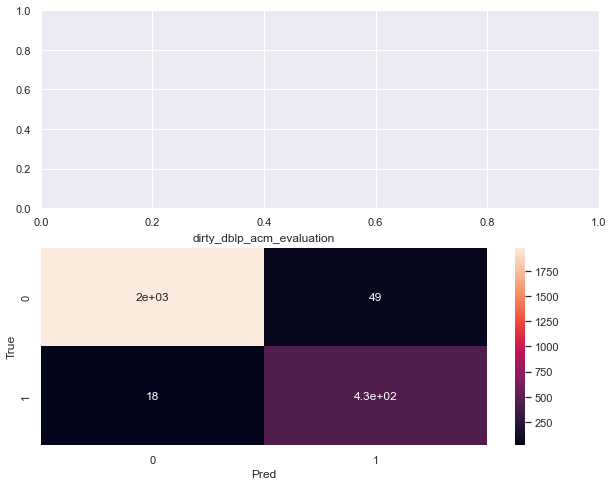

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_dblp_acm_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [24]:
print("\nDetails of dirty_dblp_acm =\n",classification_report(real_test, pre_list))


Details of dirty_dblp_acm =
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      2029
           1       0.90      0.96      0.93       444

    accuracy                           0.97      2473
   macro avg       0.94      0.97      0.96      2473
weighted avg       0.97      0.97      0.97      2473



dirty_dblp_scholar

In [25]:
dirty_dblp_scholar_train = pd.read_csv("C:/project/final_data/dirty_dblp_scholar/train.tsv", sep="\t")
dirty_dblp_scholar_train

,idx,text_left,text_right,label
0,0,the demarcation protocol : a technique for mai...,local verification of global integrity constra...,0
1,1,on-demand data elevation in hierarchical multi...,on-demand data elevation in a hierarchical mul...,1
2,2,"database tuning : principles , experiments , a...","database tuning : principles , experiments , a...",1
3,3,dna-miner : a system prototype for mining dna ...,n. stefanovic 1997 â ?? geominer : a system pr...,0
4,4,communication efficient distributed mining of ...,mining generalized association rules r agrawal...,0
...,...,...,...,...
17218,17218,a simple algorithm for finding frequent elemen...,an algorithm for in-core frequent itemset mini...,0
17219,17219,"relaxed transaction processing m singh , c tom...",persistent linda : linda + transactions + quer...,0
17220,17220,deeds towards a distributed and active real-ti...,distributed multimedia database systems suppor...,0
17221,17221,a transducer-based xml query processor b ludфs...,"a transducer-based xml query processor , p muk...",1


In [26]:
dirty_dblp_scholar_test = pd.read_csv("C:/project/final_data/dirty_dblp_scholar/test.tsv", sep="\t")
dirty_dblp_scholar_test

,idx,text_left,text_right,label
0,0,cure : an efficient clustering algorithm for l...,efficient algorithm for projected clustering e...,0
1,1,open object database management systems 1994.0,performance evaluation of a temporal database ...,0
2,2,an efficient algorithm for mining association ...,mining association rules between sets of items...,0
3,3,formal query languages for secure relational d...,a visual query language for odmg-compliant dat...,0
4,4,"a language based multidatabase system e kќhn ,...",a classification of multi-database languages p...,0
...,...,...,...,...
5737,5737,incremental clustering for mining in a data wa...,incremental organization for data recording an...,0
5738,5738,mining generalized association rules vldb r sr...,sql-like operator for mining association rules...,0
5739,5739,the design and implementation of a sequence da...,on the design and implementation of informatio...,0
5740,5740,querying multiple features of groups in relati...,the theory of joins in relational databases av...,0


In [27]:
dist_dirty_dblp_scholar_train = getDistance(dirty_dblp_scholar_train['text_left'], dirty_dblp_scholar_train['text_right'])

In [28]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_dblp_scholar_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_dirty_dblp_scholar_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0037348272642390287
0.02828158622809714
0.06865401987353206
0.12181551976573939
0.16952054794520546
0.21137757947573899
0.24801966675771644
0.2836499866202836
0.3187418086500655
0.3522464698331194
0.38378242256358597
0.4210526315789474
0.4610964807277951
0.5088126159554731
0.5514292144947107
0.5976060935799783
0.6427221172022685
0.6876012965964343
0.7206605071751523
0.7522935779816513
0.7844444444444444
0.8080043266630612
0.8292682926829269
0.8483396097226977
0.8640080093442349
0.8733824733824733
0.8801924619085807
0.8851277229274409
0.8864898210980876
0.8856580342268666
0.8827298465206378
0.880997798972854
0.875036158518947
0.8682899045991741
0.8628828322562517
0.8537123930444382
0.8414782726411262
0.8317831517406324
0.8133574941755113
0.7930600955494091
0.7718186250609459
0.7484662576687117
0.7195563603440471
0.6866443893500054
0.651880621422731
0.6111855966289983
0.5736350574712644
0.5299726390846531
0.49287420075494953
0.4615162871144422
0.4324981427703113
0.4070920183019

In [29]:
print(max_f)
print(max_t)

0.8864898210980876
0.3


In [30]:
dist_dirty_dblp_scholar_test = getDistance(dirty_dblp_scholar_test['text_left'], dirty_dblp_scholar_test['text_right'])

In [31]:
real_test = toInt(dirty_dblp_scholar_test['label'])
pre_list = prediction(dist_dirty_dblp_scholar_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.8938547486033519


[[4554  118]
 [ 110  960]]
[4554  118  110  960]


Text(66.5, 0.5, 'True')

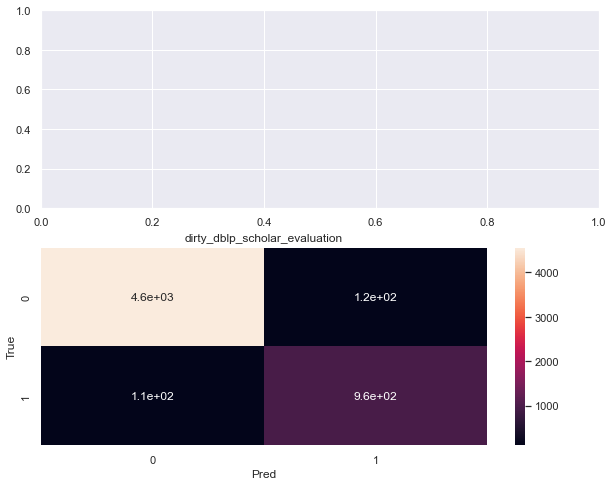

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_dblp_scholar_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [33]:
print("\nDetails of dirty_dblp_scholar =\n",classification_report(real_test, pre_list))


Details of dirty_dblp_scholar =
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      4672
           1       0.89      0.90      0.89      1070

    accuracy                           0.96      5742
   macro avg       0.93      0.94      0.93      5742
weighted avg       0.96      0.96      0.96      5742



dirty_walmart_amazon

In [34]:
dirty_walmart_amazon_train = pd.read_csv("C:/project/final_data/dirty_walmart_amazon/train.tsv", sep="\t")
dirty_walmart_amazon_train

,idx,text_left,text_right,label
0,0,elite screens cinewhite cinema235 series fixed...,cinegray ezframe series fixed frame screen - 1...,0
1,1,san diego padres iphone 4 case silicone cover ...,georgia bulldogs iphone 4 case silicone cover ...,0
2,2,innovera d3010 black compatible high-yield ton...,premium compatible hp 11x toner cartridge hp q...,0
3,3,da-lite da-plex base rear projection screen - ...,da-lite 27514 da-plex unframed rear projection...,0
4,4,pc treasures wireless optical mouse 2.4 ghz pu...,inland pro 2.4 ghz wireless optical mouse 0744...,0
...,...,...,...,...
6139,6139,gear head wireless optical tilt-wheel mouse re...,gear head 2.4 ghz mini wireless desktop and op...,0
6140,6140,cables to go usb 2.0 a b cable 9 feet white ca...,cables unlimited usb-5010-03m usb 2.0 a to b c...,0
6141,6141,epson t060320 ink cartridge magenta printers e...,epson 78 yellow ink cartridge t078420 t078420 ...,0
6142,6142,crown industrial deck plate antifatigue vinyl ...,new-crown cd0035db - industrial deck plate ant...,0


In [35]:
dirty_walmart_amazon_test = pd.read_csv("C:/project/final_data/dirty_walmart_amazon/test.tsv", sep="\t")
dirty_walmart_amazon_test

,idx,text_left,text_right,label
0,0,sony 16gb class 4 sd memory card sony 0.0 usb ...,pny 4gb class 4 navy sd card car audio video p...,0
1,1,zotac geforce gt430 1gb ddr3 pci-express 2.0 g...,evga geforce gts450 superclocked 1 gb gddr5 pc...,0
2,2,da-lite high power model b manual screen with ...,da-lite advantage manual with csr - projection...,0
3,3,da-lite hc cinema vision tensioned advantage e...,hc da-mat tensioned advantage electrol - av fo...,0
4,4,verbatim 4gb tuff - n - tiny usb 2.0 flash dri...,verbatim clip-it 4 gb usb 2.0 flash drive 9755...,0
...,...,...,...,...
2044,2044,lexar platinum ii 16gb sd sdhc memory card lex...,lexar lcf4gbbsbna200 platinum ii 4 gb 200x com...,0
2045,2045,da-lite video spectra 1.5 advantage manual wit...,da-lite advantage manual with csr - projection...,0
2046,2046,da-lite da-plex unframed rear projection scree...,da-lite 27651 da-glas deluxe rear projection s...,0
2047,2047,rca cassette adapter mp3 accessories ah760r 12...,rca vca115 vhs-c cassette adapter blank media ...,0


In [36]:
dist_dirty_walmart_amazon_train = getDistance(dirty_walmart_amazon_train['text_left'], dirty_walmart_amazon_train['text_right'])

In [37]:
threshold_list = np.linspace(0,1,101)
real = toInt(dirty_walmart_amazon_train['label'])
max_f = 0
max_t = 0
for i in range(len(threshold_list)):
    pre_list = prediction(dist_dirty_walmart_amazon_train, threshold_list[i])
    pre = toInt(pre_list)
    f = f1_score(real, pre, average='binary')
    if f>max_f:
        max_f = f
        max_t = threshold_list[i]
    print(f)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.010362694300518135
0.017211703958691912
0.020618556701030924
0.020618556701030924
0.03747870528109029
0.04745762711864407
0.05059021922428331
0.06040268456375839
0.06354515050167224
0.08264462809917356
0.11003236245954692
0.1360759493670886
0.1597542242703533
0.18777943368107303
0.2234794908062235
0.264
0.2986198243412798
0.33333333333333337
0.35268346111719606
0.3833671399594321
0.39101964452759586
0.41245791245791247
0.4147812971342383
0.40783254557731263
0.39027355623100307
0.38772213247172854
0.3604985618408437
0.3445017182130584
0.32718894009216587
0.30254996554100616
0.2830597708268814
0.2648479681727764
0.2518210197710718
0.23608124253285542
0.2274966412897447
0.2215682152617196
0.21083860759493672
0.20222180380342686
0.19628360093812014
0.19049271339347676
0.18725705594051037
0.1841845140032949
0.18082191780821918
0.17893401015228425
0.17697729052466718
0.17621554660885724
0.17435268883100966
0.17352985868409054
0.17313793624414564
0.17281348788198

In [38]:
print(max_f)
print(max_t)

0.4147812971342383
0.29


In [39]:
dist_dirty_walmart_amazon_test = getDistance(dirty_walmart_amazon_test['text_left'], dirty_walmart_amazon_test['text_right'])

In [40]:
real_test = toInt(dirty_walmart_amazon_test['label'])
pre_list = prediction(dist_dirty_walmart_amazon_test, max_t)
pre = toInt(pre_list)
f = f1_score(real_test, pre, average='binary')
print(f)

0.41002277904328016


[[1700  156]
 [ 103   90]]
[1700  156  103   90]


Text(66.5, 0.5, 'True')

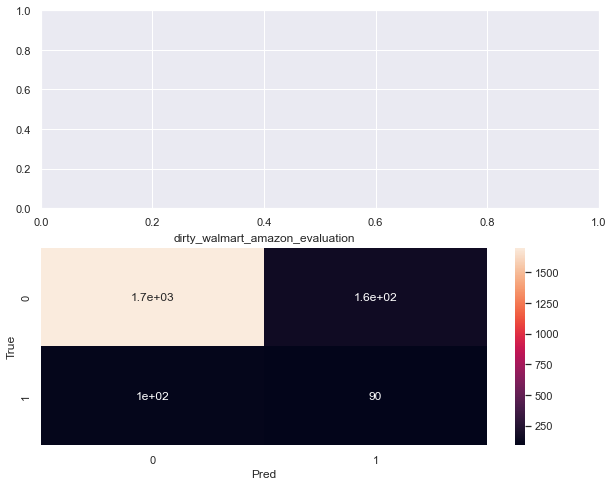

In [41]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
sns.set()
 
f, (ax1,ax2) = plt.subplots(figsize = (10, 8),nrows=2)
C2= confusion_matrix(real_test, pre_list, labels=[0, 1])
print(C2)
print(C2.ravel())
sns.heatmap(C2,annot=True)
 
ax2.set_title('dirty_walmart_amazon_evaluation')
ax2.set_xlabel('Pred')
ax2.set_ylabel('True')
#f.savefig('sns_heatmap_confusion_matrix.jpg', bbox_inches='tight')

In [42]:
print("\nDetails of dirty_walmart_amazon =\n",classification_report(real_test, pre_list))


Details of dirty_walmart_amazon =
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      1856
           1       0.37      0.47      0.41       193

    accuracy                           0.87      2049
   macro avg       0.65      0.69      0.67      2049
weighted avg       0.89      0.87      0.88      2049

